In [437]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import seaborn as sns


import scienceplots
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.style.use(['science', 'notebook', 'nature'])

from mitigation import *


In [438]:
output_figures = 'figs_results'

# Compare folding methods

In [439]:

def plot_compare_zne(ax):

    L_noisy = []
    L_noisy_std = []

    for zne_type, sim_folder in dic_to_compare.items() :

        p_noiseless_avg = pickle_load(f'results/{sim_folder}/stats/dic_p_noiseless_avg.pkl')[output_qc]
        p_noiseless_std = pickle_load(f'results/{sim_folder}/stats/dic_p_noiseless_std.pkl')[output_qc]

        p_noisy_avg = pickle_load(f'results/{sim_folder}/stats/dic_p_noisy_avg.pkl')[output_qc]
        p_noisy_std = pickle_load(f'results/{sim_folder}/stats/dic_p_noisy_std.pkl')[output_qc]


        L_noisy.append(p_noisy_avg)
        L_noisy_std.append(p_noisy_std)


    p_noisy_avg_to_plot = np.average(np.array(L_noisy), axis=0)
    p_noisy_std_to_plot = np.average(np.array(L_noisy_std), axis=0)
    ax.errorbar(noise_levels, p_noisy_avg_to_plot, yerr=p_noisy_std_to_plot, fmt='o', markersize=3, label='noisy', zorder=1)        #, color=scat.get_facecolor()[0]
    p = ax.scatter([0], p_noiseless_avg, marker='*', s=40, label='noiseless', zorder=1, color='black')        #, color=scat.get_facecolor()[0]


    for zne_type, sim_folder in dic_to_compare.items() :

        p_mitigated_avg = pickle_load(f'results/{sim_folder}/stats/dic_p_mitigated_avg.pkl')[output_qc]
        p_mitigated_std = pickle_load(f'results/{sim_folder}/stats/dic_p_mitigated_std.pkl')[output_qc]
        ax.errorbar([0], p_mitigated_avg, yerr=p_mitigated_std, fmt='s', markersize=5, label=label_of(zne_type), zorder=4)        #, color=scat.get_facecolor()[0]


def plot_model(ax) :
    # add exp model
    zne_type = 'exp'
    sim_folder = dic_to_compare[zne_type]
    p_noisy_avg = pickle_load(f'results/{sim_folder}/stats/dic_p_noisy_avg.pkl')[output_qc]
    p_noisy_std = pickle_load(f'results/{sim_folder}/stats/dic_p_noisy_std.pkl')[output_qc]

    p_mitigated_std = pickle_load(f'results/{sim_folder}/stats/dic_p_mitigated_std.pkl')[output_qc]

    p_extrapolated, x_model, y_model = mitigate(zne_type, noise_levels, p_noisy_avg, flag_dic_output=0)

    std_fun = interp1d(np.concatenate((np.array([0]), noise_levels)), np.concatenate((np.array([p_mitigated_std]), p_noisy_std)), kind='cubic')
    x_mod_fill = x_model[np.where(x_model >= 1)]
    y_mod_fill = y_model[np.where(x_model >= 1)]
    ax.fill_between(x_mod_fill, y_mod_fill - std_fun(x_mod_fill), y_mod_fill + std_fun(x_mod_fill), alpha=0.3, label=r'model $\pm 1$ std', color='red')
    ax.plot(x_model, y_model, ls='--', color='red', label='exponential model', zorder=0)
    

### layer

In [440]:
dic_to_compare = {
    'exp': '3qb_ZNE_exp_layer', 
    'lin': '3qb_ZNE_lin_layer', 
    'quad': '3qb_ZNE_quad_layer', 
    'rich_d3': '3qb_ZNE_rich_layer'
}

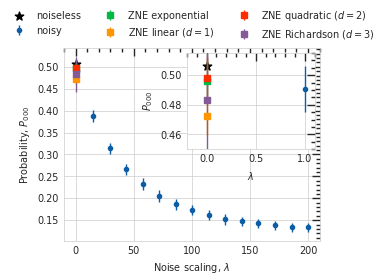

In [441]:
noise_levels = np.linspace(1, 200, 15)
output_qc = '000'

fig, ax = plt.subplots()

plot_compare_zne(ax)
ax.set_xlabel(r'Noise scaling, $\lambda$')
ax.set_ylabel(rf'Probability, $P_{{{output_qc}}}$')

axins = inset_axes(ax, width='50%', height='50%', loc='upper right')
plot_compare_zne(axins)
axins.set_xlabel(r'$\lambda$')
axins.set_ylabel(rf'$P_{{{output_qc}}}$')
axins.set_xlim([-0.2, 1.1])
axins.set_ylim([0.45, 0.515])

# plot_model(ax) 
# plot_model(axins) 

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncols=3)
plt.savefig(fname=f'./{output_figures}/3qb_ZNE-all_folding-{dic_to_compare["exp"].split("_")[-1]}.pdf')



### circuit

In [417]:
dic_to_compare = {
    'exp': '3qb_ZNE_exp_circuit', 
    'lin': '3qb_ZNE_lin_circuit', 
    'quad': '3qb_ZNE_quad_circuit', 
    'rich_d3': '3qb_ZNE_rich_circuit'
}

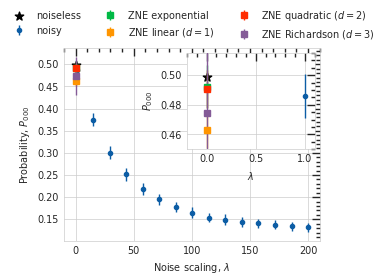

In [418]:
noise_levels = np.linspace(1, 200, 15)
output_qc = '000'

fig, ax = plt.subplots()

plot_compare_zne(ax)
ax.set_xlabel(r'Noise scaling, $\lambda$')
ax.set_ylabel(rf'Probability, $P_{{{output_qc}}}$')

axins = inset_axes(ax, width='50%', height='50%', loc='upper right')
plot_compare_zne(axins)
axins.set_xlabel(r'$\lambda$')
axins.set_ylabel(rf'$P_{{{output_qc}}}$')
axins.set_xlim([-0.2, 1.1])
axins.set_ylim([0.45, 0.515])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncols=3)
plt.savefig(fname=f'./{output_figures}/3qb_ZNE-all_folding-{dic_to_compare["exp"].split("_")[-1]}.pdf')



# Boxplot

### Layer

In [419]:
dic_to_compare = {
    'exp': '3qb_ZNE_exp_layer', 
    'lin': '3qb_ZNE_lin_layer', 
    'quad': '3qb_ZNE_quad_layer', 
    'rich_d3': '3qb_ZNE_rich_layer'
}

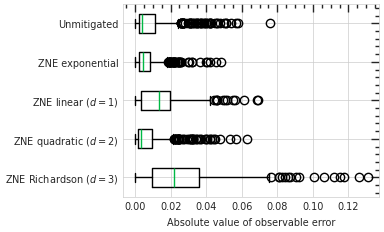

In [420]:
Ems = []
Eus = []
zne_types = []

for zne_type, sim_folder in dic_to_compare.items() :

    Em = np.loadtxt(f'results/{sim_folder}/stats/absolute_errors_Em.pkl')
    Eu = np.loadtxt(f'results/{sim_folder}/stats/absolute_errors_Eu.pkl')


    Ems.append(Em)
    Eus.append(Eu)

    zne_types.append(zne_type)

labels = [label_of(zne_type) for zne_type in zne_types]

Ems.reverse()
labels.reverse()


# too much data for box plot
keep = 400
n_crop = len(Eu) - keep
# crop = np.random.randint(0, len(Eu), n_crop, )
crop = rd.sample(range(n_crop), n_crop)
Eu = np.delete(Eu, crop)
for i, Em in enumerate(Ems) :
    Ems[i] = np.delete(Em, crop)


plt.boxplot(Ems + [Eu], labels=labels + ['Unmitigated'],  vert=False)
plt.xlabel('Absolute value of observable error')
plt.savefig(fname=f'./{output_figures}/box_plot_ZNE_folding-{dic_to_compare["exp"].split("_")[-1]}.pdf')  # ZNE exponential
plt.show()

In [421]:
dic_to_compare = {
    'exp': '3qb_ZNE_exp_circuit', 
    'lin': '3qb_ZNE_lin_circuit', 
    'quad': '3qb_ZNE_quad_circuit', 
    'rich_d3': '3qb_ZNE_rich_circuit'
}

## KDE plot

In [422]:
def kde(dic_compare) :

    fig, ax = plt.subplots()


    axins = inset_axes(ax, width='50%', height='50%', loc='upper right')
    adjust_param = 1


    for zne_type, sim_folder in dic_compare.items() :

        Em = np.loadtxt(f'results/{sim_folder}/stats/absolute_errors_Em.pkl')
        Eu = np.loadtxt(f'results/{sim_folder}/stats/absolute_errors_Eu.pkl')

        sns.kdeplot(Em, label=label_of(zne_type), bw_adjust=adjust_param, ax=ax)
        sns.kdeplot(Em, label=label_of(zne_type), bw_adjust=adjust_param, ax=axins)

        Ems.append(Em)
        Eus.append(Eu)



    sns.kdeplot(Eu, label='Unmitigated', bw_adjust=adjust_param, color='black', ax=ax)
    sns.kdeplot(Eu, label='Unmitigated', bw_adjust=adjust_param, color='black', ax=axins)

    ax.set_xlabel('Absolute value of observable error')
    axins.set_xlabel('error')
    axins.set_xlim([-0.005, 0.01])

    plt.legend(loc='upper center', bbox_to_anchor=(0, 1.70), ncols=2)


    plt.savefig(fname=f'./{output_figures}/kde_ZNE_folding-{dic_compare["exp"].split("_")[-1]}.pdf')  # ZNE exponential

### circuit

In [423]:
dic_to_compare = {
    'exp': '3qb_ZNE_exp_circuit', 
    'lin': '3qb_ZNE_lin_circuit', 
    'quad': '3qb_ZNE_quad_circuit', 
    'rich_d3': '3qb_ZNE_rich_circuit'
}

c:\Users\antho\miniconda3\envs\qiskit\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\antho\miniconda3\envs\qiskit\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\antho\miniconda3\envs\qiskit\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\antho\miniconda3\envs\qiskit\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

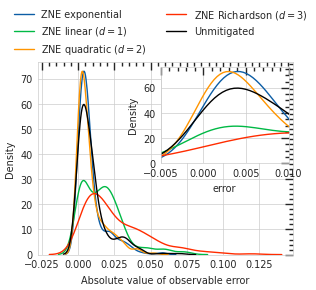

In [424]:
kde(dic_to_compare)

### layers

In [425]:
dic_to_compare = {
    'exp': '3qb_ZNE_exp_layer', 
    'lin': '3qb_ZNE_lin_layer', 
    'quad': '3qb_ZNE_quad_layer', 
    'rich_d3': '3qb_ZNE_rich_layer'
}

c:\Users\antho\miniconda3\envs\qiskit\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\antho\miniconda3\envs\qiskit\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\antho\miniconda3\envs\qiskit\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\antho\miniconda3\envs\qiskit\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

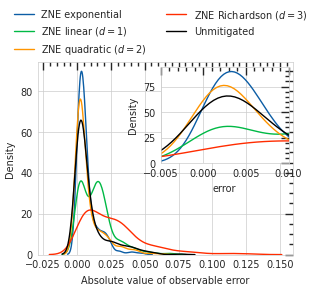

In [426]:
kde(dic_to_compare)

### circuit vs layer

In [427]:
dic_to_compare = {
    'layer': '3qb_ZNE_quad_layer', 
    'circuit': '3qb_ZNE_quad_circuit'
}

(400,)
(400,)


c:\Users\antho\miniconda3\envs\qiskit\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\antho\miniconda3\envs\qiskit\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


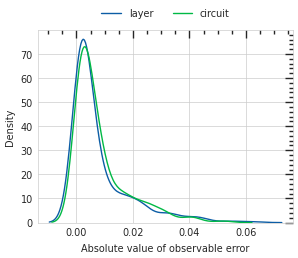

In [428]:
fig, ax = plt.subplots()


adjust_param = 1


for zne_type, sim_folder in dic_to_compare.items() :

    Em = np.loadtxt(f'results/{sim_folder}/stats/absolute_errors_Em.pkl')
    Eu = np.loadtxt(f'results/{sim_folder}/stats/absolute_errors_Eu.pkl')
    print(Em.shape)

    sns.kdeplot(Em, label=f'{sim_folder.split("_")[-1]}', bw_adjust=adjust_param, ax=ax)

ax.set_xlabel('Absolute value of observable error')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.16), ncols=2)


plt.savefig(fname=f'./{output_figures}/kde_ZNE_comp_folding.pdf')  # ZNE exponential

# best result

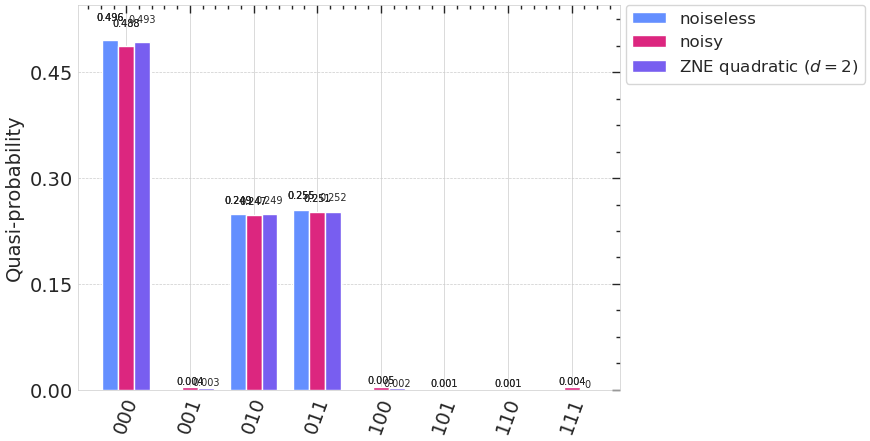

In [435]:
zne_type = 'quad'
sim_folder = f'3qb_ZNE_{zne_type}_circuit'

possible_outputs = generate_binary_values(num_bits=3)

mitigated = pickle_load(f'./results/{sim_folder}/stats/dic_p_mitigated_avg.pkl')
mitigated = bound_to_0_1(mitigated)
noisy = pickle_load(f'./results/{sim_folder}/stats/dic_p_noisy_avg.pkl')
for output_qc in possible_outputs :
    p = noisy[output_qc]
    noisy[output_qc] = p[0]
noiseless = pickle_load(f'./results/{sim_folder}/stats/dic_p_noiseless_avg.pkl')

plot_histogram([noiseless, noisy, mitigated], legend=['noiseless', 'noisy', label_of(zne_type)], filename=f'./{output_figures}/histogram_comp_noisy_noiseless_mitigation.pdf')   
plot_histogram([noiseless, noisy, mitigated], legend=['noiseless', 'noisy', label_of(zne_type)])   


count < 1:  173.0
count >= 1:  208.0
fraction < 1: 0.4540682414698163


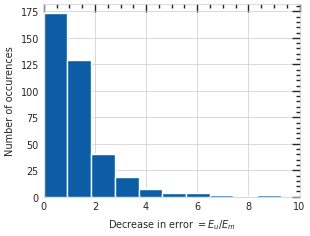

In [443]:
zne_type = 'quad'
sim_folder = f'3qb_ZNE_{zne_type}_circuit'

Em = np.loadtxt(f'results/{sim_folder}/stats/absolute_errors_Em.pkl')
Eu = np.loadtxt(f'results/{sim_folder}/stats/absolute_errors_Eu.pkl')

ratio = Eu / Em

ratio = ratio[np.where(ratio < 10)]

p = plt.hist(ratio, bins=10)
plt.xlabel(r'Decrease in error $= E_u/E_m$')
plt.ylabel(r'Number of occurences')
plt.xlim([0, 10])
# plt.savefig(fname=f'./{output_figures}/decrease_in_error.pdf')  # ZNE exponential
print("count < 1: ", p[0][0])
print("count >= 1: ", np.sum(p[0][1:]))
print('fraction < 1:', p[0][0] / (np.sum(p[0][1:])+p[0][0]))


In [444]:
Em.shape

(400,)